# **Assignment:** Linear Regression

## Using Simple Linear Regression Method:

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [164]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [145]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [166]:
# Now, Preparing Data

new_df = df.drop('per capita income (US$)', axis='columns')
new_df.head(3)

,year
0,1970
1,1971
2,1972


In [167]:
income = df['per capita income (US$)']
income.tail(3)

44    41039.89360
45    35175.18898
46    34229.19363
Name: per capita income (US$), dtype: float64

In [168]:
# Now, Training the Model

lr = linear_model.LinearRegression()
lr.fit(new_df, income)

LinearRegression()

In [196]:
# Now, Making Predictions

years_df = pd.read_csv("years.csv")

In [190]:
# Testing on un-seen data

print("2020:", lr.predict([[2020]]))
print("2021:", lr.predict([[2021]]))
print("2022:", lr.predict([[2022]]))
print("2023:", lr.predict([[2023]]))
print("2024:", lr.predict([[2024]]))

2020: [41288.69409442]
2021: [42117.15916964]
2022: [42945.62424486]
2023: [43774.08932009]
2024: [44602.55439531]


In [158]:
pred = lr.predict(years_df)
pred

array([ 6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 18091.67198818, 18920.1370634 , 19748.60213863,
       20577.06721385, 21405.53228907, 22233.9973643 , 23062.46243952,
       23890.92751474, 24719.39258996, 25547.85766519, 26376.32274041,
       33832.50841741, 34660.97349264, 35489.43856786, 36317.90364308,
       37146.3687183 , 37974.83379353, 38803.29886875, 39631.76394397,
       40460.22901919, 41288.69409442, 42117.15916964])

In [162]:
lr.coef_

array([828.46507522])

In [163]:
lr.intercept_

-1632210.7578554575

In [194]:
years_df['income'] = pred
years_df.head()

,year,income
0,1978,6493.160935
1,1979,7321.626010
2,1980,8150.091086
3,1981,8978.556161
4,1982,9807.021236


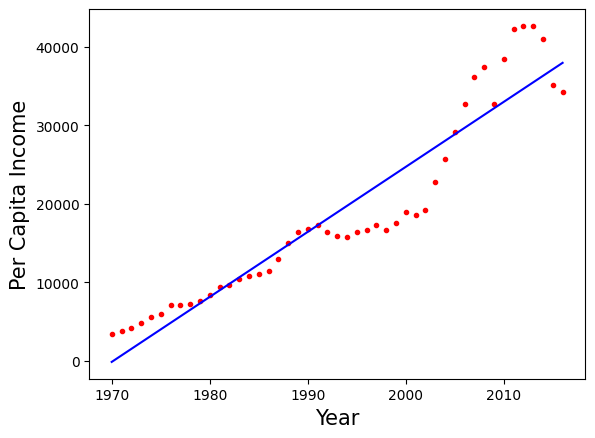

In [195]:
# Data Visualization

plt.xlabel('Year', fontsize=15)
plt.ylabel('Per Capita Income', fontsize=15)
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='.')
plt.plot(df['year'], lr.predict(df[['year']]), color='blue')
plt.show()

In [173]:
# Now, Saving Predictions

pred_df = pd.DataFrame({'Year': years_df['year'], 'Predicted_Per_Capita_Income (USD)': pred})

In [180]:
pred_df.to_csv("prediction.csv", index=False)
pred_df.head()

,Year,Predicted_Per_Capita_Income (USD)
0,1978,6493.160935
1,1979,7321.626010
2,1980,8150.091086
3,1981,8978.556161
4,1982,9807.021236


In [175]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Year                               27 non-null     int64  
 1   Predicted_Per_Capita_Income (USD)  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [177]:
pred_df.describe()

,Year,Predicted_Per_Capita_Income (USD)
count,27.000000,27.000000
mean,2001.592593,26038.799932
std,13.973214,11576.319869
min,1978.000000,6493.160935
25%,1993.500000,19334.369601
50%,2000.000000,24719.392590
75%,2014.500000,36732.136181
max,2021.000000,42117.159170


The linear regression model successfully predicts per capita income based on years, capturing the overall trend in the data.

## Now, Using Train Test Split Method:

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [248]:
train_df = pd.read_csv('canada_per_capita_income.csv')
test_df = pd.read_csv('years.csv')

**EDA on Train Data:**

In [247]:
train_df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [246]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [249]:
train_df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


**EDA on Test Data:**

In [251]:
test_df.head()

,year
0,1978
1,1979
2,1980
3,1981
4,1982


In [250]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    27 non-null     int64
dtypes: int64(1)
memory usage: 344.0 bytes


In [252]:
test_df.describe()

,year
count,27.000000
mean,2001.592593
std,13.973214
min,1978.000000
25%,1993.500000
50%,2000.000000
75%,2014.500000
max,2021.000000


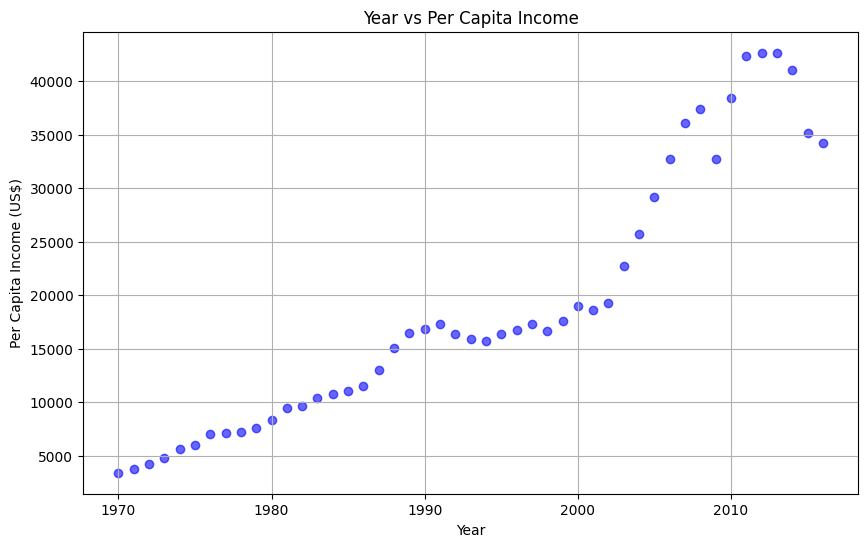

In [298]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['per capita income (US$)'], color='blue', alpha=0.6)
plt.title('Year vs Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.grid(True)
plt.show()

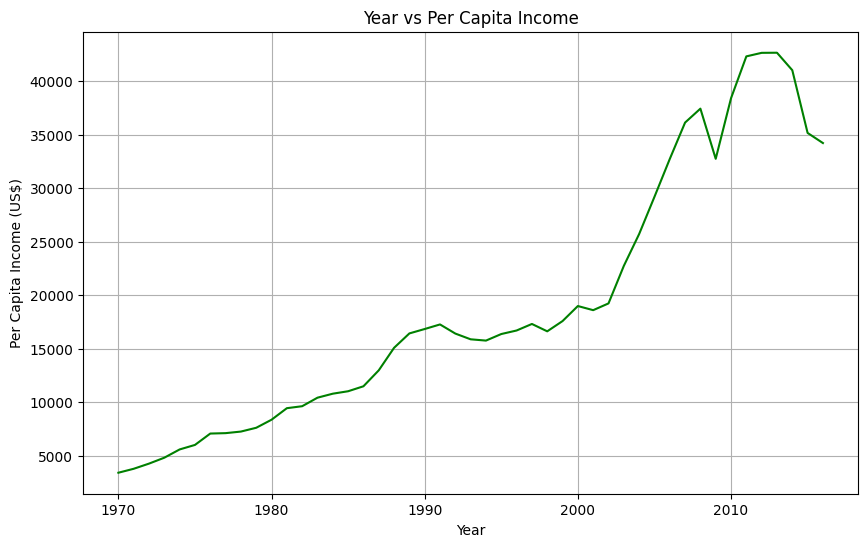

In [299]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['per capita income (US$)'], color='green')
plt.title('Year vs Per Capita Income')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.grid(True)
plt.show()

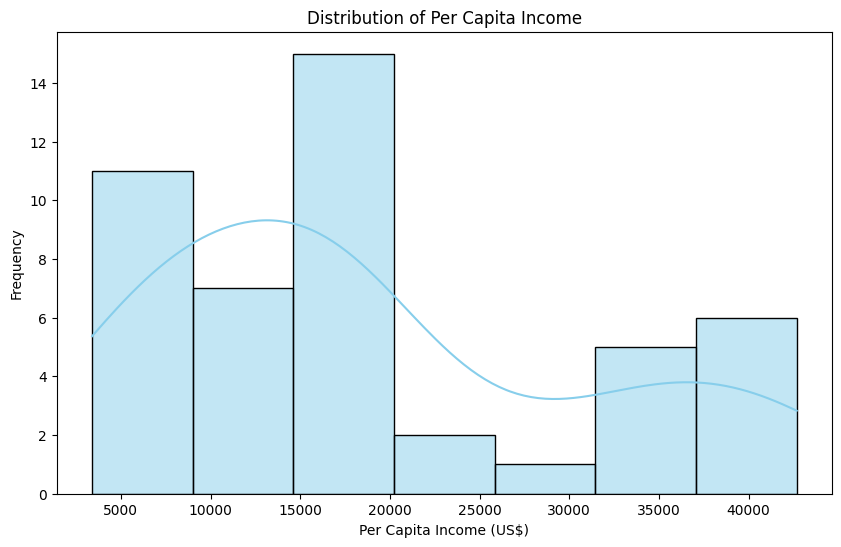

In [257]:
plt.figure(figsize=(10, 6))
sns.histplot(df['per capita income (US$)'], kde=True, color='skyblue')
plt.title('Distribution of Per Capita Income')
plt.xlabel('Per Capita Income (US$)')
plt.ylabel('Frequency')
plt.show()

In [219]:
# Now, Preparing Data into x & y

x = train_df[['year']]
y = train_df['per capita income (US$)']

In [220]:
x

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [224]:
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

In [243]:
# Now, Spliting data into Train & Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [225]:
x_train

,year
13,1983
17,1987
44,2014
15,1985
9,1979
16,1986
29,1999
32,2002
45,2015
0,1970


In [226]:
y_train

13    10416.536590
17    12974.806620
44    41039.893600
15    11018.955850
9      7602.912681
16    11482.891530
29    17581.024140
32    19232.175560
45    35175.188980
0      3399.299037
31    18601.397240
30    18987.382410
5      5998.144346
11     9434.390652
34    25719.147150
1      3768.297935
41    42334.711210
21    17266.097690
2      4251.175484
35    29198.055690
23    15875.586730
37    36144.481220
10     8355.968120
22    16412.083090
18    15080.283450
46    34229.193630
20    16838.673200
7      7100.126170
42    42665.255970
14    10790.328720
28    16622.671870
38    37446.486090
Name: per capita income (US$), dtype: float64

In [227]:
x_test

,year
27,1997
39,2009
26,1996
43,2013
24,1994
36,2006
12,1982
19,1989
4,1974
25,1995


In [228]:
y_test

27    17310.757750
39    32755.176820
26    16699.826680
43    42676.468370
24    15755.820270
36    32738.262900
12     9619.438377
19    16426.725480
4      5576.514583
25    16369.317250
8      7247.967035
3      4804.463248
6      7062.131392
40    38420.522890
33    22739.426280
Name: per capita income (US$), dtype: float64

In [242]:
# Now, Training the Model

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [241]:
# Now, Making Predictions

pred = reg.predict(test_df)

In [259]:
pred

array([ 6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 18091.67198818, 18920.1370634 , 19748.60213863,
       20577.06721385, 21405.53228907, 22233.9973643 , 23062.46243952,
       23890.92751474, 24719.39258996, 25547.85766519, 26376.32274041,
       33832.50841741, 34660.97349264, 35489.43856786, 36317.90364308,
       37146.3687183 , 37974.83379353, 38803.29886875, 39631.76394397,
       40460.22901919, 41288.69409442, 42117.15916964])

In [240]:
# Now, Saving Predictions

pred_df = pd.DataFrame({'Year': test_df['year'], 'Predicted_Per_Capita_Income': pred})
pred_df.to_csv('prediction.csv', index=False)

In [300]:
# reg.score(x_test, y_test)

print("Model Accuracy:", reg.score(x_test, y_test))

Model Accuracy: 0.9005705995581692
